In [1]:
import pandas as pd


In [2]:
# download file "market_logs.log" and extract data
market_logs = pd.read_csv("market_logs.log", header=None, names=['time_side','price','vol_glass'])
market_logs['time'] = market_logs['time_side'].apply(lambda x: int(x.split()[4]))
market_logs['side'] = market_logs['time_side'].apply(lambda x: int(x.split()[7]))
market_logs['price'] = market_logs['price'].apply(lambda x: float(x.split()[1]))
market_logs['volume'] = market_logs['vol_glass'].apply(lambda x: int(x.split()[2]))
market_logs['volume_bid'] = market_logs['vol_glass'].apply(lambda x: int(x.split()[6].split('@')[0]))
market_logs['volume_ask'] = market_logs['vol_glass'].apply(lambda x: int(x.split('@')[2]))
market_logs['bid_price'] = market_logs['vol_glass'].apply(lambda x: float(x.split('@')[1].split('x')[0]))
market_logs['ask_price'] = market_logs['vol_glass'].apply(lambda x: float(x.split('@')[1].split('x')[1]))

del market_logs['time_side']
del market_logs['vol_glass']

# mid_price = (ask_price + bid_price)/2 calculating
market_logs['mid_price'] = (
    market_logs['bid_price'] + market_logs['ask_price']) / 2

print(market_logs.info())
market_logs


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397802 entries, 0 to 397801
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   price       397802 non-null  float64
 1   time        397802 non-null  int64  
 2   side        397802 non-null  int64  
 3   volume      397802 non-null  int64  
 4   volume_bid  397802 non-null  int64  
 5   volume_ask  397802 non-null  int64  
 6   bid_price   397802 non-null  float64
 7   ask_price   397802 non-null  float64
 8   mid_price   397802 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 27.3 MB
None


,price,time,side,volume,volume_bid,volume_ask,bid_price,ask_price,mid_price
0,1108.9,1622505601191796236,-1,36,6,104,1108.7,1108.8,1108.75
1,1108.7,1622505601222248272,-1,17,10,23,1108.5,1108.6,1108.55
2,1108.5,1622505601364445668,-1,20,16,23,1108.3,1108.6,1108.45
3,1108.6,1622505601405325968,1,1,16,22,1108.3,1108.6,1108.45
4,1108.3,1622505601406994624,-1,16,18,12,1108.2,1108.3,1108.25
...,...,...,...,...,...,...,...,...,...
397797,1150.5,1627626542759155628,1,1,217,92,1150.4,1150.5,1150.45
397798,1150.5,1627626543983252140,1,1,187,126,1150.4,1150.5,1150.45
397799,1150.5,1627626549091604988,1,94,6,365,1150.5,1150.6,1150.55
397800,1150.5,1627626549092524892,-1,6,177,365,1150.4,1150.6,1150.50


In [3]:

# download file "exec_logs.log" and extract data
exec_logs = pd.read_csv("exec_logs.log", header=None, names=[
                        'time', 'side', 'price', 'traded_volume', 'volume_left', 'delta_execsend'])
exec_logs['time'] = exec_logs['time'].apply(lambda x: int(x.split()[4]))
exec_logs['side'] = exec_logs['side'].apply(lambda x: int(x.split()[1]))
exec_logs['price'] = exec_logs['price'].apply(lambda x: float(x.split()[1]))
exec_logs['traded_volume'] = exec_logs['traded_volume'].apply(lambda x: int(x.split()[2]))
exec_logs['volume_left'] = exec_logs['volume_left'].apply(lambda x: int(x.split()[4]))
exec_logs['delta_execsend'] = exec_logs['delta_execsend'].apply(
    lambda x: int(x.split()[1]))
print(exec_logs.info())
exec_logs


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8682 entries, 0 to 8681
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            8682 non-null   int64  
 1   side            8682 non-null   int64  
 2   price           8682 non-null   float64
 3   traded_volume   8682 non-null   int64  
 4   volume_left     8682 non-null   int64  
 5   delta_execsend  8682 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 407.1 KB
None


,time,side,price,traded_volume,volume_left,delta_execsend
0,1622505601222248272,1,1108.6,1,10,30451968
1,1622505601424113404,-1,1108.4,1,22,17118720
2,1622505601604667896,1,1108.3,1,2,153866496
3,1622505602982200992,-1,1108.4,1,1,153371136
4,1622505603600579508,1,1108.3,1,6,618378496
...,...,...,...,...,...,...
8677,1627626326117581668,1,1149.9,1,564,2381312
8678,1627626397873668620,-1,1150.2,1,331,1296281088
8679,1627626412584847188,1,1150.1,1,97,14703859968
8680,1627626473991536064,-1,1150.4,1,10,12134184704


In [26]:
# merge market_logs and exec_logs

merge_log = market_logs.merge(exec_logs, how='outer', on='time', sort=True, indicator=True)
merge_log["mid_price"].bfill(axis=None, inplace=True)

# calculate dmid5
m = merge_log[["time", "price_y", "side_y", "delta_execsend"]
              ][merge_log["side_y"].notna() == True].reset_index(drop=True)
for i, tm in enumerate(m["time"]):
    mc = merge_log["time"][merge_log["time"] < (tm+5000000000)]
    mcind = len(mc)
    midprice5 = merge_log.at[mcind, "mid_price"]
    m.at[i, "dmid5"] = (midprice5 - m.at[i, "price_y"]
                        ) * m.at[i, "side_y"]
display(m)


,time,price_y,side_y,delta_execsend,dmid5
0,1622505601222248272,1108.6,1.0,3.045197e+07,0.05
1,1622505601424113404,1108.4,-1.0,1.711872e+07,-0.05
2,1622505601604667896,1108.3,1.0,1.538665e+08,0.15
3,1622505602982200992,1108.4,-1.0,1.533711e+08,-0.15
4,1622505603600579508,1108.3,1.0,6.183785e+08,0.05
...,...,...,...,...,...
8677,1627626326117581668,1149.9,1.0,2.381312e+06,-0.05
8678,1627626397873668620,1150.2,-1.0,1.296281e+09,0.05
8679,1627626412584847188,1150.1,1.0,1.470386e+10,0.05
8680,1627626473991536064,1150.4,-1.0,1.213418e+10,-0.05


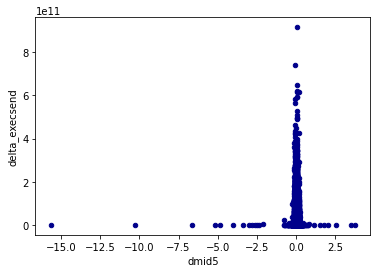

In [27]:
dplot = m[["dmid5", "delta_execsend"]]
ax1 = dplot.plot.scatter(x='dmid5', y='delta_execsend', c='DarkBlue')


In [31]:
print("pearson corr=", dplot.corr("pearson").iat[0, 1])
print("kendall corr=", dplot.corr("kendall").iat[0, 1])
print("spearman corr=", dplot.corr("spearman").iat[0, 1])


pearson corr= 0.02288395808170557
kendall corr= 0.05806087595061514
spearman corr= 0.08292806294812888
